<a href="https://colab.research.google.com/github/pravallika-1305/WISE_ML/blob/main/DecisionTree_Wines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np 
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [13]:
df = pd.read_csv('/content/drive/My Drive/Data/Wine.csv', names = ['class','Alcohol','MalicAcid','Ash','AshAlcalinity','Magnesium','Phenol','Flavanoid','NonFlavanoid','Proanthocyanins','ColorIntensity','Hue','DilutedWines','Proline'])

In [15]:
df.head()

,class,Alcohol,MalicAcid,Ash,AshAlcalinity,Magnesium,Phenol,Flavanoid,NonFlavanoid,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   class            178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   MalicAcid        178 non-null    float64
 3   Ash              178 non-null    float64
 4   AshAlcalinity    178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenol           178 non-null    float64
 7   Flavanoid        178 non-null    float64
 8   NonFlavanoid     178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  ColorIntensity   178 non-null    float64
 11  Hue              178 non-null    float64
 12  DilutedWines     178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [19]:
features = df.drop(['class'], axis=1)
features.head()

,Alcohol,MalicAcid,Ash,AshAlcalinity,Magnesium,Phenol,Flavanoid,NonFlavanoid,Proanthocyanins,ColorIntensity,Hue,DilutedWines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [24]:
target = df['class']
target.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [64]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124 entries, 138 to 102
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Alcohol          124 non-null    float64
 1   MalicAcid        124 non-null    float64
 2   Ash              124 non-null    float64
 3   AshAlcalinity    124 non-null    float64
 4   Magnesium        124 non-null    int64  
 5   Phenol           124 non-null    float64
 6   Flavanoid        124 non-null    float64
 7   NonFlavanoid     124 non-null    float64
 8   Proanthocyanins  124 non-null    float64
 9   ColorIntensity   124 non-null    float64
 10  Hue              124 non-null    float64
 11  DilutedWines     124 non-null    float64
 12  Proline          124 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 13.6 KB


In [63]:
len(y_train)

124

In [79]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

In [80]:
def train_using_gini(X_train, y_train): 

    clf_gini = DecisionTreeClassifier(criterion = "gini", random_state = 100)
    clf_gini.fit(X_train, y_train) 
    return clf_gini

In [81]:
def train_using_entropy(X_train, y_train):

    clf_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 100)
    clf_entropy.fit(X_train, y_train) 
    return clf_entropy

In [82]:
def prediction(X_test, clf_object): 
    y_pred = clf_object.predict(X_test) 
    return y_pred

In [83]:
clf_gini = train_using_gini(X_train, y_train) 
clf_entropy = train_using_entropy(X_train, y_train) 

In [84]:
y_pred_gini = prediction(X_train, clf_gini) 
print("Training Accuracy:" + str(accuracy_score(y_train, y_pred_gini)*100))

y_pred_gini_test = prediction(X_test, clf_gini) 
print("Testing Accuracy:" + str(accuracy_score(y_test, y_pred_gini_test)*100))

Training Accuracy:100.0
Testing Accuracy:94.44444444444444


In [91]:
 y_pred_entropy = prediction(X_train, clf_entropy)
 print("Training Accuracy:" + str(accuracy_score(y_train, y_pred_entropy)*100))

 y_pred_entropy_test = prediction(X_test, clf_entropy) 
print("Testing Accuracy:" + str(accuracy_score(y_test, y_pred_entropy_test)*100))

Training Accuracy:100.0
Testing Accuracy:85.18518518518519


In [88]:
[str(i) for i in df['class'].unique()]

['1', '2', '3']

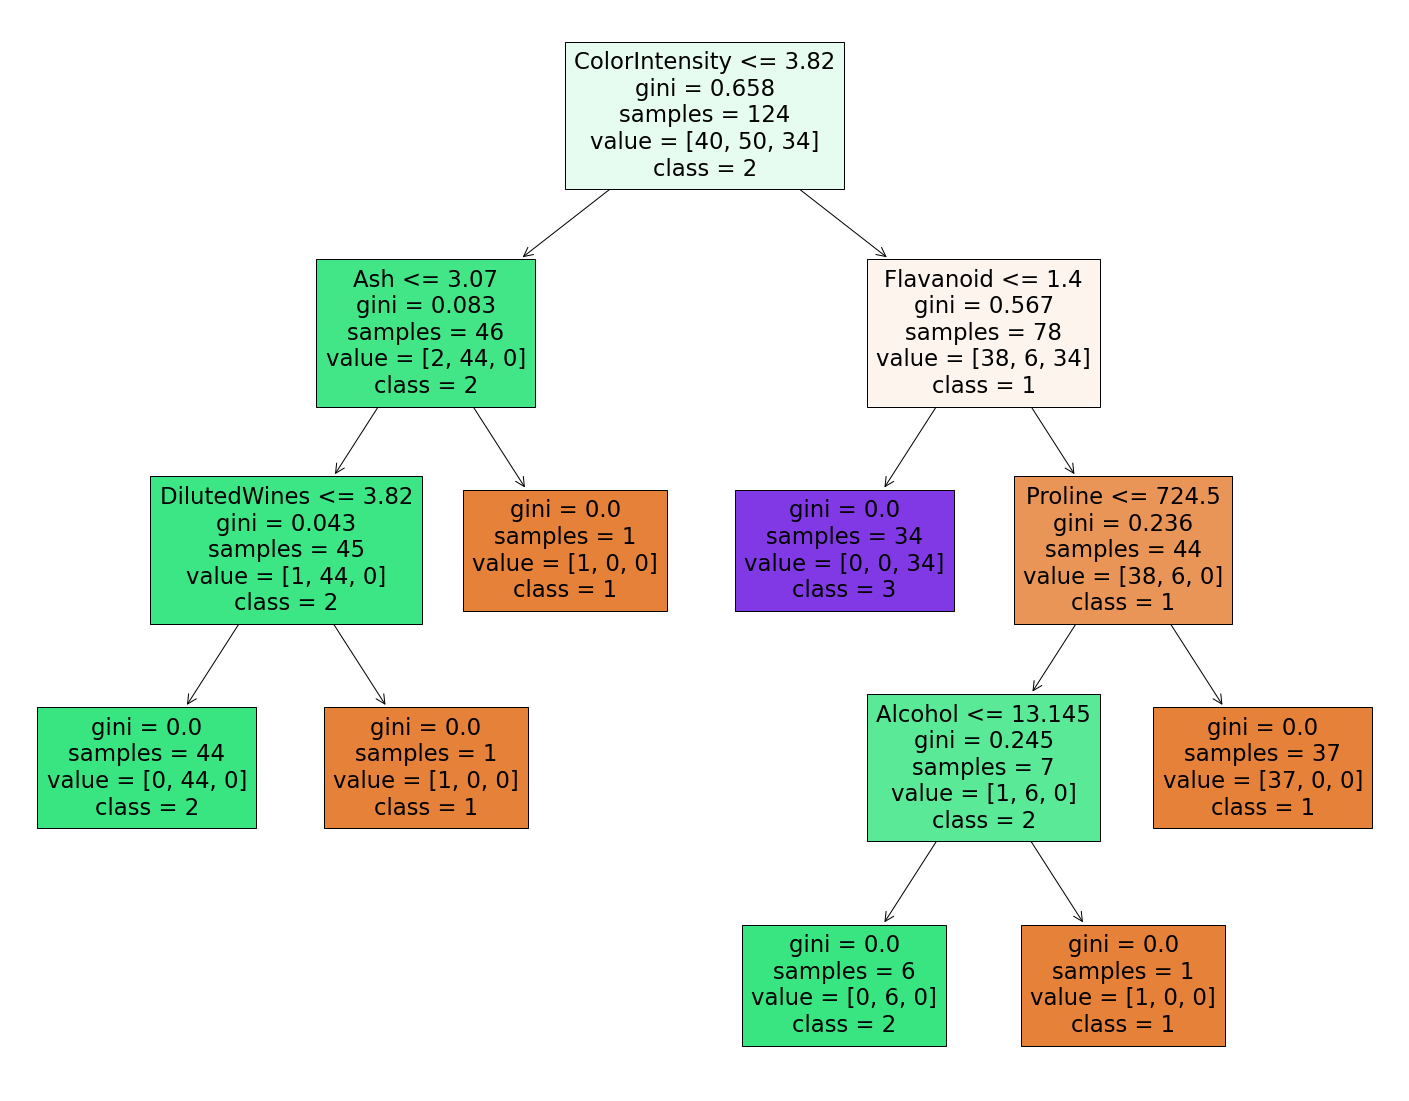

In [89]:
fig = plt.figure(figsize=(25, 20))
plot_tree(clf_gini, filled=True, feature_names=features.columns, class_names=[str(i) for i in df['class'].unique()])
plt.show()

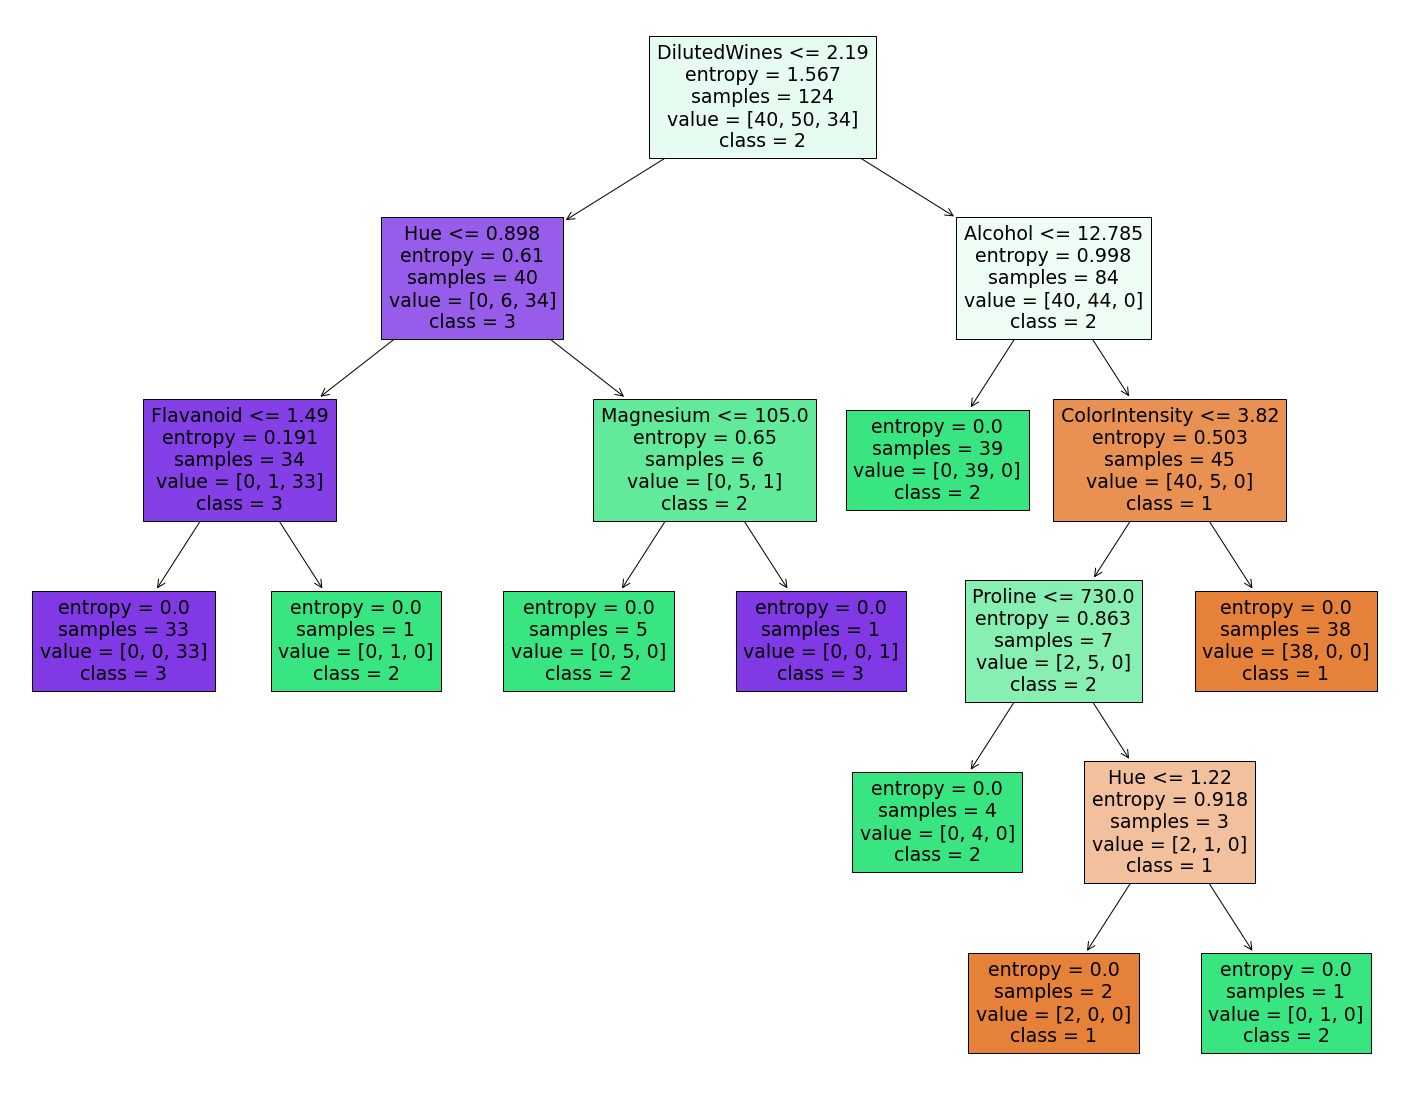

In [90]:
fig = plt.figure(figsize=(25, 20))
plot_tree(clf_entropy, filled=True, feature_names=features.columns, class_names=[str(i) for i in df['class'].unique()])
plt.show()